## Installation and import blocks

In [1]:
%pip install seaborn
%pip install matplotlib
%pip install pandas
%pip install numpy
%pip install pm4py
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to us

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pm4py
import locale
locale.getpreferredencoding = lambda: "UTF-8"

## Data retrieving (step 1 : Data Collection)

In [3]:
# Retrieve the original events log from the provided .xes file [warning: do not use a celeron like me!]
original_event_log = pm4py.read_xes("../Assets/Road_Traffic_Fine_Management_Process.xes")
orginal_data_frame = pm4py.convert_to_dataframe(original_event_log)
original_event_log.head()

/home/pietro/.local/lib/python3.10/site-packages/pm4py/util/dt_parsing/parser.py:77: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(
/home/pietro/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 150370/150370 [01:36<00:00, 1565.08it/s]


,amount,org:resource,dismissal,concept:name,vehicleClass,totalPaymentAmount,lifecycle:transition,time:timestamp,article,points,case:concept:name,expense,notificationType,lastSent,paymentAmount,matricola
0,35.0,561,NIL,Create Fine,A,0.0,complete,2006-07-24 00:00:00+00:00,157.0,0.0,A1,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,Send Fine,NaN,NaN,complete,2006-12-05 00:00:00+00:00,NaN,NaN,A1,11.0,NaN,NaN,NaN,NaN
2,35.0,561,NIL,Create Fine,A,0.0,complete,2006-08-02 00:00:00+00:00,157.0,0.0,A100,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,Send Fine,NaN,NaN,complete,2006-12-12 00:00:00+00:00,NaN,NaN,A100,11.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Insert Fine Notification,NaN,NaN,complete,2007-01-15 00:00:00+00:00,NaN,NaN,A100,NaN,P,P,NaN,NaN


In [4]:
# Printing the start and end activities of the event log
start_activities = pm4py.get_start_activities(original_event_log)
end_activities = pm4py.get_end_activities(original_event_log)
print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))

Start activities: {'Create Fine': 150370}
End activities: {'Send Fine': 20755, 'Send for Credit Collection': 58997, 'Payment': 67201, 'Send Appeal to Prefecture': 3144, 'Appeal to Judge': 134, 'Notify Result Appeal to Offender': 86, 'Receive Result Appeal from Prefecture': 53}


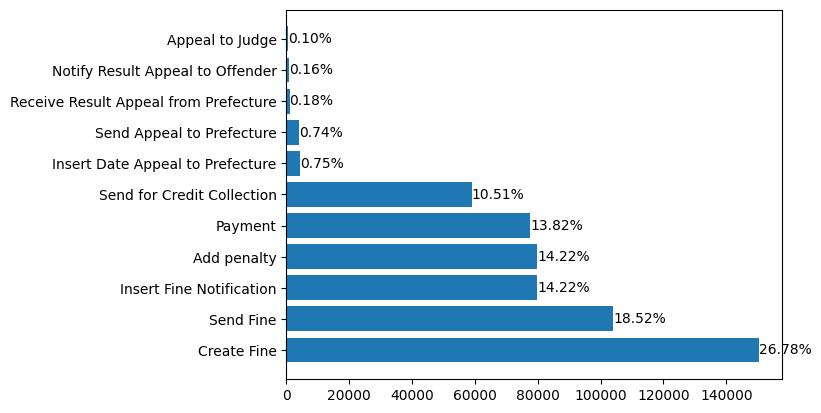

In [5]:
activities_number = original_event_log.get("concept:name").value_counts()
bars = plt.barh(activities_number.index, activities_number.values)
plt.bar_label(bars, labels=[str('%.2f'%((x/original_event_log.get("concept:name").count())*100)+'%') for x in bars.datavalues])
plt.show()

## Some original stats:

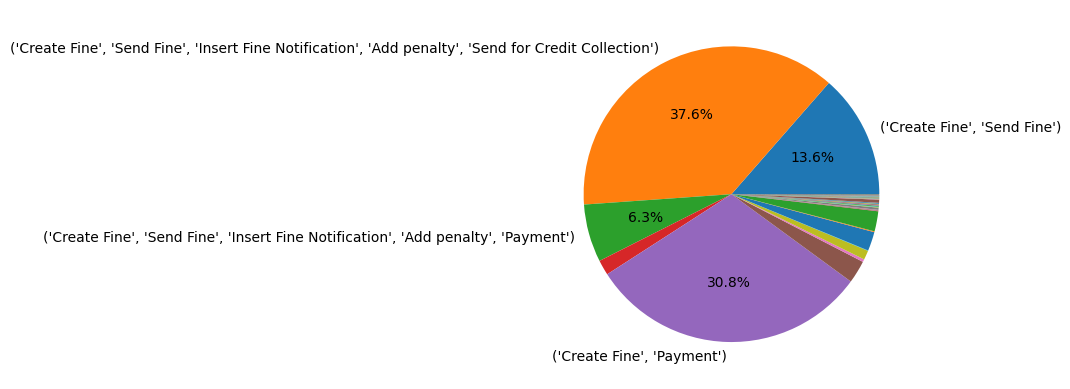

In [6]:
# Original event log stats:
original_variants = pm4py.get_variants(original_event_log)

# Convert the variants dictionary to a pandas Series\
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(original_variants.values(), labels=original_variants.keys(), autopct='%1.1f%%')

threshold = 5
for label, pct_label in zip(texts, autotexts):
    pct_value = pct_label.get_text().rstrip('%')
    if float(pct_value) < threshold:
        label.set_text('')
        pct_label.set_text('')     
plt.show()


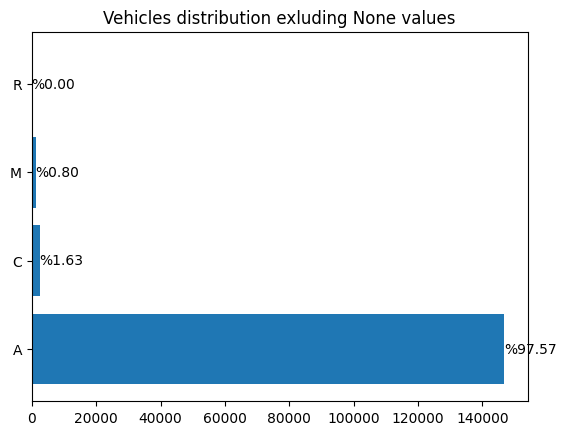

Amounts stats:
Mean 63.68165603961256 - Median 38.0 - Mode 0    35.0
Name: amount, dtype: float64
Total Payments Amounts stats:
Mean 17.815603519745938 - Median 0.0 - Mode 0    0.0
Name: totalPaymentAmount, dtype: float64
Articolo più utilizzato: nan
Articolo meno utilizzato: 159.0
Articoli totali: 67


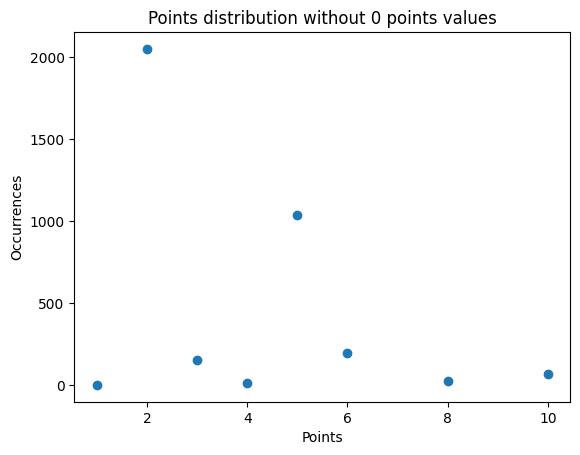

count       8.000000
mean      443.500000
std       734.432726
min         2.000000
25%        23.750000
50%       111.000000
75%       405.250000
max      2050.000000
Name: count, dtype: float64

In [7]:
vehicles_number = original_event_log["vehicleClass"][(original_event_log["vehicleClass"] != "None")].value_counts()
vehicles_number = vehicles_number.filter(items=["A", "C", "M", "R"], axis=0)

bars = plt.barh(vehicles_number.index, vehicles_number.values)
plt.bar_label(bars, labels=['%' + '%.2f'%((x/original_event_log.get("vehicleClass").count())*100) for x in bars.datavalues])
plt.title("Vehicles distribution exluding None values")
plt.show()

#points expense	
amounts = original_event_log["amount"][(original_event_log["amount"] != "None")]
print("Amounts stats:\nMean {} - Median {} - Mode {}".format(amounts.mean(), amounts.median(), amounts.mode()))

totalPaymentsAmount = original_event_log["totalPaymentAmount"][(original_event_log["totalPaymentAmount"] != "None")]
print("Total Payments Amounts stats:\nMean {} - Median {} - Mode {}".format(totalPaymentsAmount.mean(), totalPaymentsAmount.median(), totalPaymentsAmount.mode()))

# Converti la serie in una serie di stringhe
articles = original_event_log["article"][original_event_log["article"] != "None"].astype(str)
article_counts = articles.value_counts()

# Stampa le statistiche
print("Articolo più utilizzato:", article_counts.idxmax())
print("Articolo meno utilizzato:", article_counts.idxmin())
print("Articoli totali:", articles.unique().size)

points = original_event_log["points"][(original_event_log["points"] != "None")]
points = points[points != 0]
points = points.value_counts()
plt.scatter(points.index, points.values)
plt.xlabel("Points")
plt.ylabel("Occurrences")
plt.title("Points distribution without 0 points values")
plt.show()
points.describe()

# Start of Filtering step (step 2 : Data Preprocessing)

Before doing the filtering we will fill then nan values, classify the dismissal property and the amount property into new values.

In this step we will shorten the dataset with:

1. A maximum number of activities for trace as 9 (The box plot Maximum is 9.5, even if the point n.3 will cut up even more)
2. We will consider only the variants that cover at least 0.24% of the cases in the event log (we will cover ~98.6% of all of the event logs this way)
3. A maximum duration of the traces of 1494,6 days (The box plot Maximum)

In [8]:
# Replacing the nan values with None for practice reason, not worth to remove the rows  because they are not many and the dataset will be ruined or useless
def classify_dismissal(row):
    if row['dismissal'] in ['#','G']:
        return 'Y'
    elif pd.isna(row['dismissal']) or row['dismissal'] == 'NIL':
        return 'N'
    else:
        return '?'
dismissal_event_log = original_event_log
dismissal_event_log['dismissal'] = dismissal_event_log.apply(classify_dismissal, axis=1)

In [9]:
def classify_amounts(row):
    if row['concept:name'] == 'Create Fine' or row['concept:name'] == 'Add penalty':
        return row ['amount']
    elif row ['concept:name'] == 'Send Fine':
        return row['expense']
    elif row ['concept:name'] == 'Payment':
        return row['paymentAmount']
    else:
        return 0
amounts_event_log = dismissal_event_log
amounts_event_log['amount'] = amounts_event_log.apply(classify_amounts, axis=1)

In [10]:
amounts_event_log=amounts_event_log.fillna(0)

In [11]:
# 1 Filtering for number of activities 
filtered_log = pm4py.filter_case_size(amounts_event_log, 1, 9)
filtered_log

,amount,org:resource,dismissal,concept:name,vehicleClass,totalPaymentAmount,lifecycle:transition,time:timestamp,article,points,case:concept:name,expense,notificationType,lastSent,paymentAmount,matricola
0,35.00,561,N,Create Fine,A,0.0,complete,2006-07-24 00:00:00+00:00,157.0,0.0,A1,0.00,0,0,0.0,0.0
1,11.00,0,N,Send Fine,0,0.0,complete,2006-12-05 00:00:00+00:00,0.0,0.0,A1,11.00,0,0,0.0,0.0
2,35.00,561,N,Create Fine,A,0.0,complete,2006-08-02 00:00:00+00:00,157.0,0.0,A100,0.00,0,0,0.0,0.0
3,11.00,0,N,Send Fine,0,0.0,complete,2006-12-12 00:00:00+00:00,0.0,0.0,A100,11.00,0,0,0.0,0.0
4,0.00,0,N,Insert Fine Notification,0,0.0,complete,2007-01-15 00:00:00+00:00,0.0,0.0,A100,0.00,P,P,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561465,131.00,25,N,Create Fine,A,0.0,complete,2002-09-07 00:00:00+00:00,142.0,0.0,V9999,0.00,0,0,0.0,0.0
561466,15.16,0,N,Send Fine,0,0.0,complete,2002-10-25 00:00:00+00:00,0.0,0.0,V9999,15.16,0,0,0.0,0.0
561467,0.00,0,N,Insert Fine Notification,0,0.0,complete,2002-11-04 00:00:00+00:00,0.0,0.0,V9999,0.00,P,N,0.0,0.0
561468,262.00,0,N,Add penalty,0,0.0,complete,2003-01-03 00:00:00+00:00,0.0,0.0,V9999,0.00,0,0,0.0,0.0


In [12]:
# 3 Filtering for the variants that cover at least 0.24% of the cases in the event log (we will cover ~98.6% of all of the event logs this way)
filtered_log = pm4py.filter_variants_top_k(filtered_log, 9)
filtered_log

,amount,org:resource,dismissal,concept:name,vehicleClass,totalPaymentAmount,lifecycle:transition,time:timestamp,article,points,case:concept:name,expense,notificationType,lastSent,paymentAmount,matricola
0,35.00,561,N,Create Fine,A,0.0,complete,2006-07-24 00:00:00+00:00,157.0,0.0,A1,0.00,0,0,0.0,0.0
1,11.00,0,N,Send Fine,0,0.0,complete,2006-12-05 00:00:00+00:00,0.0,0.0,A1,11.00,0,0,0.0,0.0
2,35.00,561,N,Create Fine,A,0.0,complete,2006-08-02 00:00:00+00:00,157.0,0.0,A100,0.00,0,0,0.0,0.0
3,11.00,0,N,Send Fine,0,0.0,complete,2006-12-12 00:00:00+00:00,0.0,0.0,A100,11.00,0,0,0.0,0.0
4,0.00,0,N,Insert Fine Notification,0,0.0,complete,2007-01-15 00:00:00+00:00,0.0,0.0,A100,0.00,P,P,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561465,131.00,25,N,Create Fine,A,0.0,complete,2002-09-07 00:00:00+00:00,142.0,0.0,V9999,0.00,0,0,0.0,0.0
561466,15.16,0,N,Send Fine,0,0.0,complete,2002-10-25 00:00:00+00:00,0.0,0.0,V9999,15.16,0,0,0.0,0.0
561467,0.00,0,N,Insert Fine Notification,0,0.0,complete,2002-11-04 00:00:00+00:00,0.0,0.0,V9999,0.00,P,N,0.0,0.0
561468,262.00,0,N,Add penalty,0,0.0,complete,2003-01-03 00:00:00+00:00,0.0,0.0,V9999,0.00,0,0,0.0,0.0


In [13]:
# 3 Filtering for maximum duration of the traces (1494.6 days)
case_durations = pm4py.get_all_case_durations(filtered_log)
# the durations are in seconds, so we need to convert them to days
more_duration, less_duration = 0, 0 
max_duration = ((1494.6*24)*60)*60
for case_duration in case_durations:
    if case_duration > max_duration :
        more_duration += 1
    else:
        less_duration += 1        
print("Cases with more duration than 1494.6 days: {}\nCases with less duration than 1494.6 days: {}".format(more_duration, less_duration))
filtered_log = pm4py.filter_case_performance(filtered_log, min_performance=0, max_performance=max_duration)

Cases with more duration than 1494.6 days: 359
Cases with less duration than 1494.6 days: 146579


## Statistical Analysis:

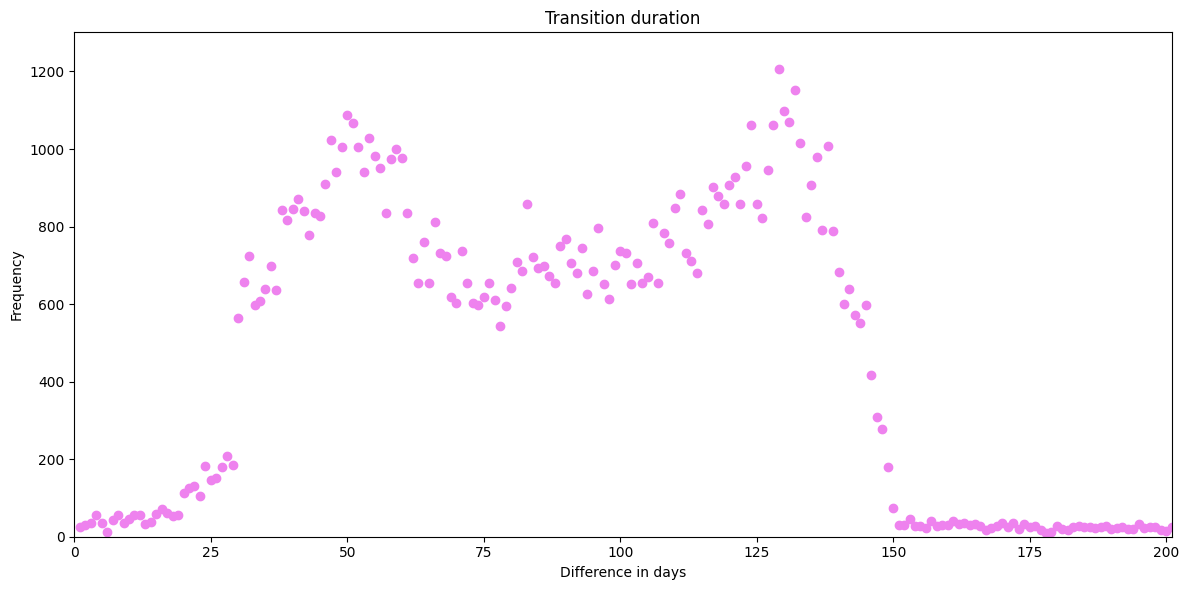

      Days  Count
0      0.0   2760
1      1.0     26
2      2.0     30
3      3.0     35
4      4.0     56
..     ...    ...
366  480.0      1
367  493.0      1
368  508.0      1
369  593.0      1
370  732.0      1

[371 rows x 2 columns]
Mean of the differences: 87.5490779179307
Median of the differences: 88.0
Sample Standard Deviation: 42.449078942194994


In [14]:
create_send_fines = filtered_log[filtered_log['concept:name'].isin(['Create Fine', 'Send Fine'])]

pivot = create_send_fines.pivot_table(index='case:concept:name', columns='concept:name', values='time:timestamp', aggfunc='min').reset_index()
pivot = pivot.rename(columns={"Create Fine": "Create_Time", "Send Fine": "Send_Time"})

pivot['Days'] = (pivot['Send_Time'] - pivot['Create_Time']).dt.days
pivot = pivot.dropna(subset=['Create_Time', 'Send_Time'])

duration_frequency = pivot.groupby('Days').size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
plt.plot(duration_frequency['Days'], duration_frequency['Count'], 'o', color='violet')
plt.xlabel('Difference in days')
plt.ylabel('Frequency')
plt.title('Transition duration')

# Set axis limits
plt.xlim(0, 201)
plt.ylim(0, 1301)

# Add more labels on the axis
plt.tight_layout()
plt.show()
print(duration_frequency)
mean_difference = pivot['Days'].mean()
print(f"Mean of the differences: {mean_difference}")

median_difference = pivot['Days'].median()
print(f"Median of the differences: {median_difference}")

# Calculate standard deviation
std_deviation = np.std(pivot['Days'], ddof=1)
print("Sample Standard Deviation:", std_deviation)
  

### Paid

In [15]:
# Get all the activities before Payment
issued = filtered_log[filtered_log['concept:name'] != 'Payment']
# Sum issued amount of each activity
issued_amounts = issued.groupby('case:concept:name')['amount'].sum().reset_index()
issued_amounts.columns = ['case:concept:name', 'issuedAmount']

# Filter and group paid amounts
paid = filtered_log[filtered_log['concept:name'] == 'Payment']
# Sum paid amount for each case
paid_amounts = paid.groupby('case:concept:name')['amount'].sum().reset_index()
paid_amounts.columns = ['case:concept:name', 'paidAmount']

# Join the Dataframes on case
merged_amounts = issued_amounts.set_index('case:concept:name').join(
    paid_amounts.set_index('case:concept:name'), how='left'
)

merged_amounts.reset_index(inplace=True)
# Fill NaN values in with zero
merged_amounts['paidAmount'] = merged_amounts['paidAmount'].fillna(0).astype(np.int32)

# Retain only cases where the issued and paid amounts match exactly (excluding cases with both amounts as 0).
compare_amounts = merged_amounts[
    (merged_amounts['issuedAmount'] == merged_amounts['paidAmount']) & (merged_amounts['issuedAmount'] != 0)
]

# Dataset of paid cases
paid_cases = filtered_log[filtered_log['case:concept:name'].isin(compare_amounts['case:concept:name'].tolist())]

# Sort the event log by case and timestamp
sorted_event_log = filtered_log.sort_values(by=['case:concept:name', 'time:timestamp'])

# Get the last activity for each case
last_activities = sorted_event_log.groupby('case:concept:name').last().reset_index()

# Filter out cases where the last activity is not a payment
payment_cases = last_activities[last_activities['concept:name'] == 'Payment']

# Get the case names where the last activity is a payment
payment_case_names = payment_cases['case:concept:name'].tolist()

# Filter the original event log to include only these cases
paid_cases = filtered_log[filtered_log['case:concept:name'].isin(payment_case_names)]



/tmp/ipykernel_15655/3332542957.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  create_send_fines_paid['time:timestamp'] = pd.to_datetime(create_send_fines_paid["time:timestamp"]).dt.tz_localize(None)


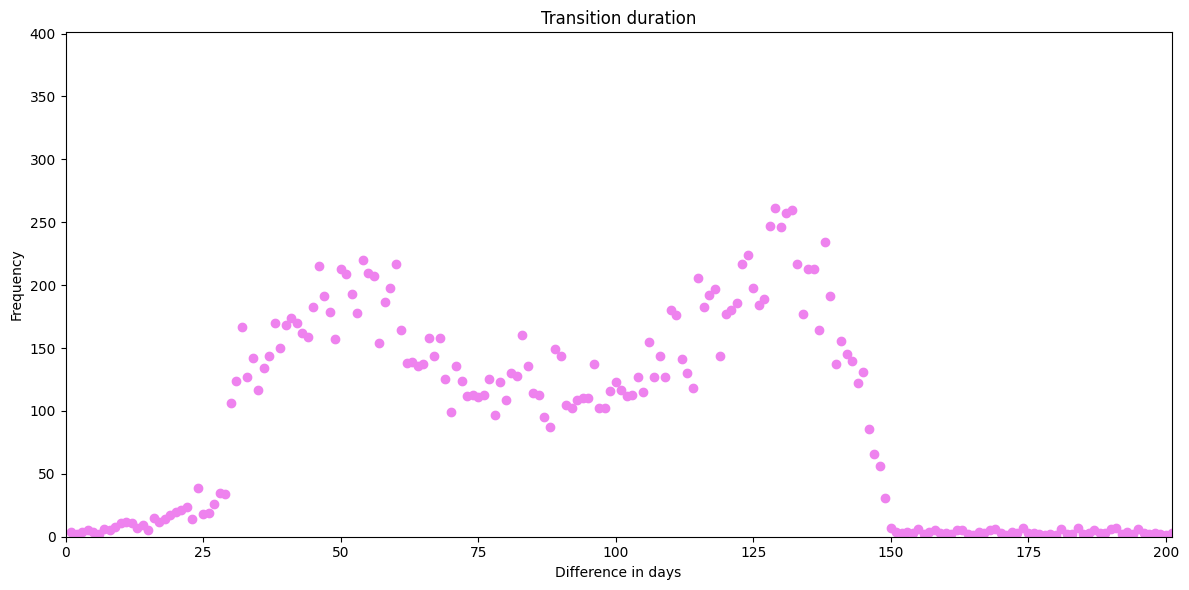

Mean of the differences: 87.79896357262612
Median of the differences: 89.0
Sample Standard Deviation: 42.204179171035996


In [16]:
# New plot of paid cases:
create_send_fines_paid = paid_cases[paid_cases['concept:name'].isin(['Create Fine', 'Send Fine'])]
create_send_fines_paid['time:timestamp'] = pd.to_datetime(create_send_fines_paid["time:timestamp"]).dt.tz_localize(None)

pivot_paid = create_send_fines_paid.pivot_table(index='case:concept:name', columns='concept:name', values='time:timestamp', aggfunc='min').reset_index()
pivot_paid = pivot_paid.rename(columns={"Create Fine": "Create_Time", "Send Fine": "Send_Time"})

pivot_paid['Days'] = (pivot_paid['Send_Time'] - pivot_paid['Create_Time']).dt.days
pivot_paid = pivot_paid.dropna(subset=['Create_Time', 'Send_Time'])

paid_duration_frequency = pivot_paid.groupby('Days').size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
plt.plot(paid_duration_frequency['Days'], paid_duration_frequency['Count'], 'o', color='violet')
plt.xlabel('Difference in days')
plt.ylabel('Frequency')
plt.title('Transition duration')

# Set axis limits
plt.xlim(0, 201)
plt.ylim(0, 401)

# Add more labels on the axis
plt.tight_layout()
plt.show()

mean_difference = pivot_paid['Days'].mean()
print(f"Mean of the differences: {mean_difference}")

median_difference = pivot_paid['Days'].median()
print(f"Median of the differences: {median_difference}")

# Calculate standard deviation
std_deviation = np.std(pivot_paid['Days'], ddof=1)
print("Sample Standard Deviation:", std_deviation)
  

### Unpaid

In [17]:
# Get all the activities before Payment
issued = filtered_log[filtered_log['concept:name'] != 'Payment']
# Sum issued amount of each activity
issued_amounts = issued.groupby('case:concept:name')['amount'].sum().reset_index()
issued_amounts.columns = ['case:concept:name', 'issuedAmount']

# Filter and group paid amounts
paid = filtered_log[filtered_log['concept:name'] == 'Payment']
# Sum paid amount for each case
paid_amounts = paid.groupby('case:concept:name')['amount'].sum().reset_index()
paid_amounts.columns = ['case:concept:name', 'paidAmount']

# Join the Dataframes on case
merged_amounts = issued_amounts.set_index('case:concept:name').join(
    paid_amounts.set_index('case:concept:name'), how='left'
)

merged_amounts.reset_index(inplace=True)
# Fill NaN values in with zero
merged_amounts['paidAmount'] = merged_amounts['paidAmount'].fillna(0).astype(np.int32)

# Retain only cases where the issued and paid amounts don't match.
compare_amounts = merged_amounts[
  (merged_amounts['issuedAmount'] != merged_amounts['paidAmount']) &
  ((merged_amounts['issuedAmount'] != 0) & (merged_amounts['paidAmount'] == 0))
  ]  # Identify non-conformant cases


# Dataset of unpaid cases
unpaid_cases = filtered_log[filtered_log['case:concept:name'].isin(compare_amounts['case:concept:name'].tolist())]
print('Number of conformant cases: {}'.format(len(filtered_log['case:concept:name'].unique().tolist())))

Number of conformant cases: 146579


/tmp/ipykernel_15655/4235764830.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  create_send_fines_unpaid['time:timestamp'] = pd.to_datetime(create_send_fines_unpaid["time:timestamp"]).dt.tz_localize(None)


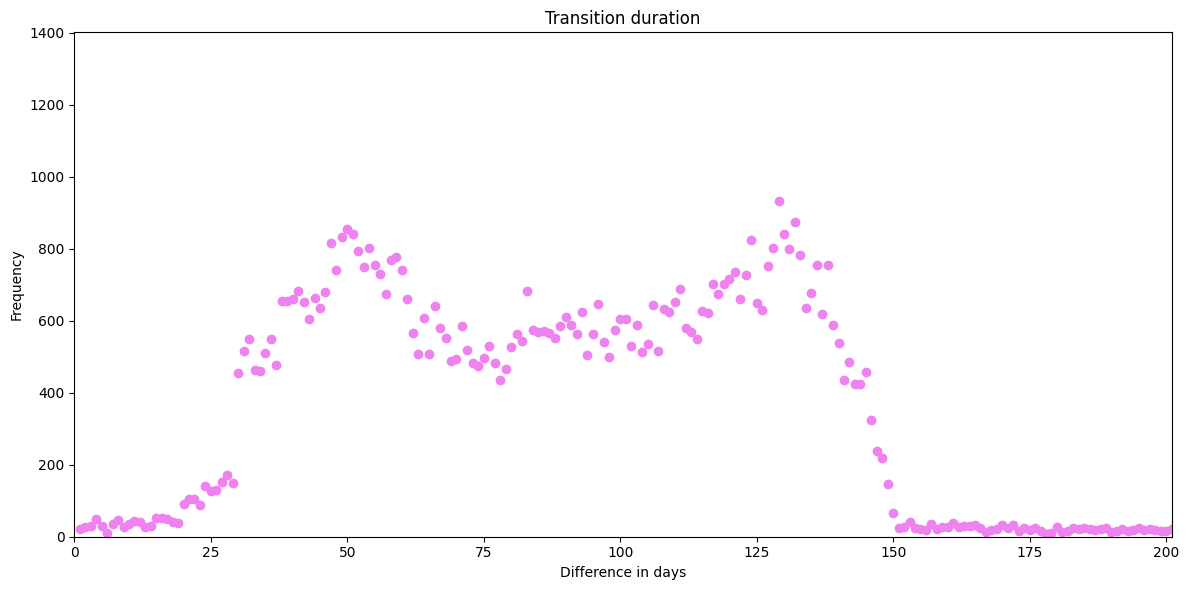

Mean of the differences: 87.53628379062468
Median of the differences: 87.0
Sample Standard Deviation: 42.57793283102664


In [18]:
# New plot of unpaid cases:
create_send_fines_unpaid = unpaid_cases[unpaid_cases['concept:name'].isin(['Create Fine', 'Send Fine'])]
create_send_fines_unpaid['time:timestamp'] = pd.to_datetime(create_send_fines_unpaid["time:timestamp"]).dt.tz_localize(None)

pivot_unpaid = create_send_fines_unpaid.pivot_table(index='case:concept:name', columns='concept:name', values='time:timestamp', aggfunc='min').reset_index()
pivot_unpaid = pivot_unpaid.rename(columns={"Create Fine": "Create_Time", "Send Fine": "Send_Time"})

pivot_unpaid['Days'] = (pivot_unpaid['Send_Time'] - pivot_unpaid['Create_Time']).dt.days
pivot_unpaid = pivot_unpaid.dropna(subset=['Create_Time', 'Send_Time'])

unpaid_duration_frequency = pivot_unpaid.groupby('Days').size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
plt.plot(unpaid_duration_frequency['Days'], unpaid_duration_frequency['Count'], 'o', color='violet')
plt.xlabel('Difference in days')
plt.ylabel('Frequency')
plt.title('Transition duration')

# Set axis limits
plt.xlim(0, 201)
plt.ylim(0, 1401)

# Add more labels on the axis
plt.tight_layout()
plt.show()

mean_difference = pivot_unpaid['Days'].mean()
print(f"Mean of the differences: {mean_difference}")

median_difference = pivot_unpaid['Days'].median()
print(f"Median of the differences: {median_difference}")

# Calculate standard deviation
std_deviation = np.std(pivot_unpaid['Days'], ddof=1)
print("Sample Standard Deviation:", std_deviation)
  

In [19]:
## Testing normality
from scipy.stats import kstest, shapiro

#perform Shapiro-Wilk test for normality
S_TestResult = shapiro(duration_frequency["Count"])
print(f"Shapiro-Wilk pvalue: {S_TestResult.pvalue}")

#perform Kolmogorov-Smirnov test for normality
K_S_TestResult= kstest(duration_frequency["Count"], 'norm')
print(f"Kolmogorov-Smirnov pvalue: {K_S_TestResult.pvalue}")

if K_S_TestResult.pvalue > 0.05 and S_TestResult.pvalue > 0.05:
    print("There is not enough evidence to reject the null hypothesis that the data is normally distributed.")
else:
    print("The data is not normally distributed.")

Shapiro-Wilk pvalue: 1.5987238704688675e-25
Kolmogorov-Smirnov pvalue: 1.0559869343631394e-295
The data is not normally distributed.


In [20]:
filtered_variants = pm4py.get_variants(filtered_log)

for key in filtered_variants.keys():
    print(f"Variant: {key} - Frequency: {filtered_variants[key]}")


Variant: ('Create Fine', 'Send Fine') - Frequency: 20385
Variant: ('Create Fine', 'Send Fine', 'Insert Fine Notification', 'Add penalty', 'Send for Credit Collection') - Frequency: 56359
Variant: ('Create Fine', 'Send Fine', 'Insert Fine Notification', 'Add penalty', 'Payment') - Frequency: 9519
Variant: ('Create Fine', 'Send Fine', 'Insert Fine Notification', 'Insert Date Appeal to Prefecture', 'Add penalty', 'Send Appeal to Prefecture') - Frequency: 2273
Variant: ('Create Fine', 'Payment') - Frequency: 46371
Variant: ('Create Fine', 'Send Fine', 'Insert Fine Notification', 'Add penalty', 'Payment', 'Payment') - Frequency: 3736
Variant: ('Create Fine', 'Send Fine', 'Insert Fine Notification', 'Add penalty', 'Payment', 'Send for Credit Collection') - Frequency: 1508
Variant: ('Create Fine', 'Send Fine', 'Payment') - Frequency: 3127
Variant: ('Create Fine', 'Send Fine', 'Insert Fine Notification', 'Payment', 'Add penalty', 'Payment') - Frequency: 3301


/home/pietro/.local/lib/python3.10/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]


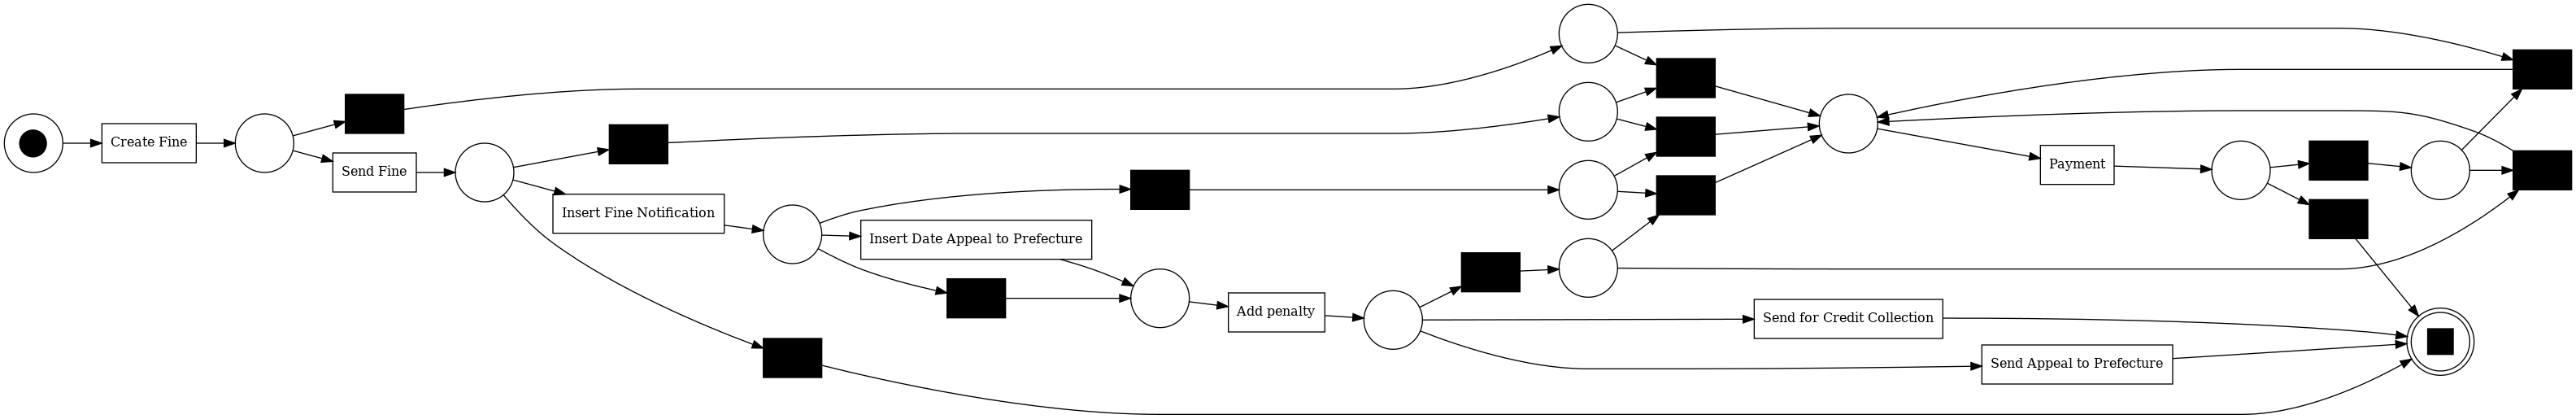

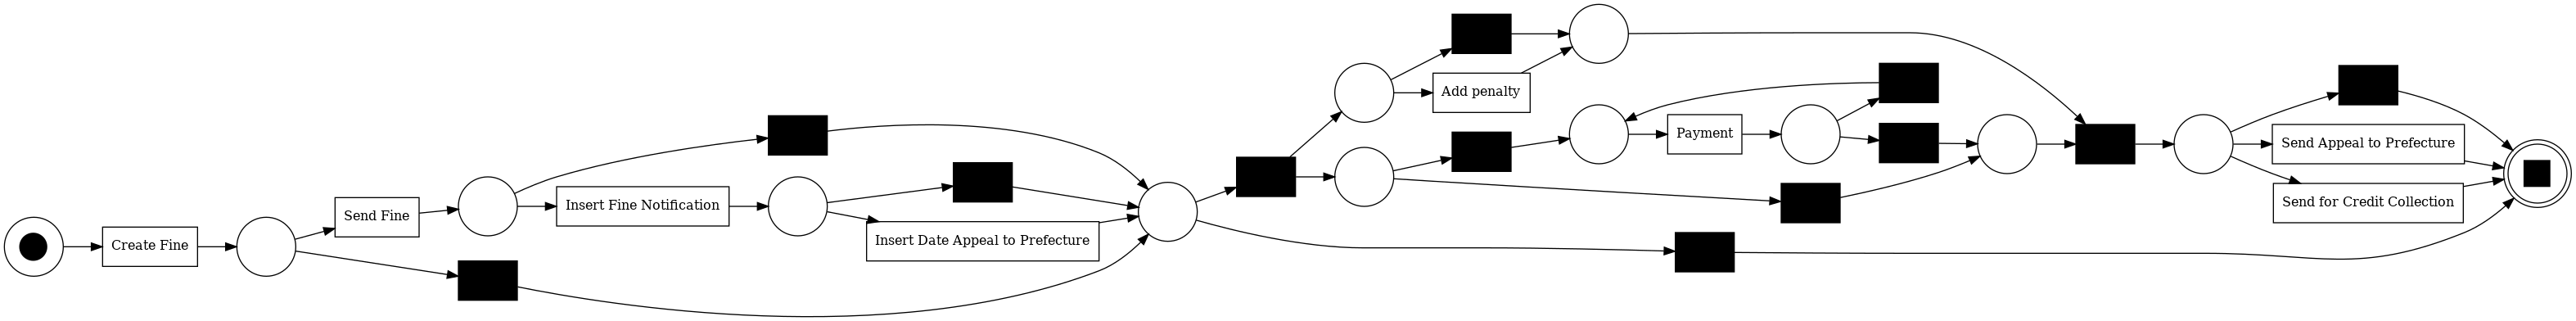

In [21]:
heuristic = pm4py.discover_petri_net_heuristics(filtered_log)
pm4py.view_petri_net(heuristic[0], heuristic[1], heuristic[2])
inductive = pm4py.discover_petri_net_inductive(filtered_log)
pm4py.view_petri_net(inductive[0], inductive[1], inductive[2])

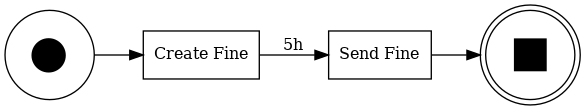

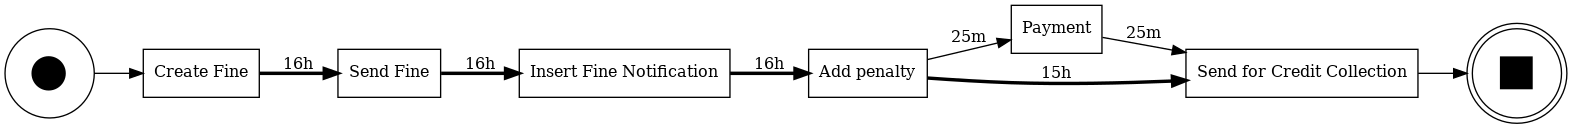

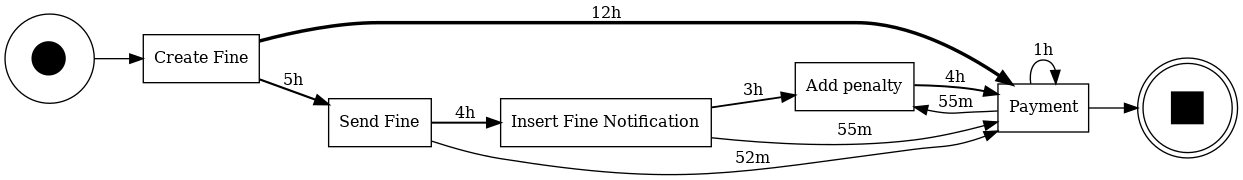

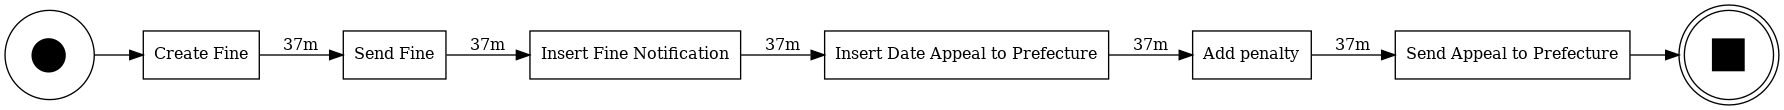

In [22]:
send_fine_end = pm4py.filter_end_activities(filtered_log, ["Send Fine"])
send_for_credi_collection_end = pm4py.filter_end_activities(filtered_log, ["Send for Credit Collection"])
payment_end = pm4py.filter_end_activities(filtered_log, ["Payment"])
send_appeal_to_prefecture_end = pm4py.filter_end_activities(filtered_log, ["Send Appeal to Prefecture"])

send_fine_dfg = pm4py.discover_directly_follows_graph(send_fine_end)
pm4py.view_performance_dfg(send_fine_dfg[0], send_fine_dfg[1], send_fine_dfg[2])

send_for_credi_collection_dfg = pm4py.discover_directly_follows_graph(send_for_credi_collection_end)
pm4py.view_performance_dfg(send_for_credi_collection_dfg[0], send_for_credi_collection_dfg[1], send_for_credi_collection_dfg[2])

payment_dfg = pm4py.discover_directly_follows_graph(payment_end)
pm4py.view_performance_dfg(payment_dfg[0], payment_dfg[1], payment_dfg[2])

send_appeal_to_prefecture_dfg = pm4py.discover_directly_follows_graph(send_appeal_to_prefecture_end)
pm4py.view_performance_dfg(send_appeal_to_prefecture_dfg[0], send_appeal_to_prefecture_dfg[1], send_appeal_to_prefecture_dfg[2])

### Conformance Checking:

aligning log, completed variants :: 100%|██████████| 9/9 [00:00<00:00, 41.62it/s]


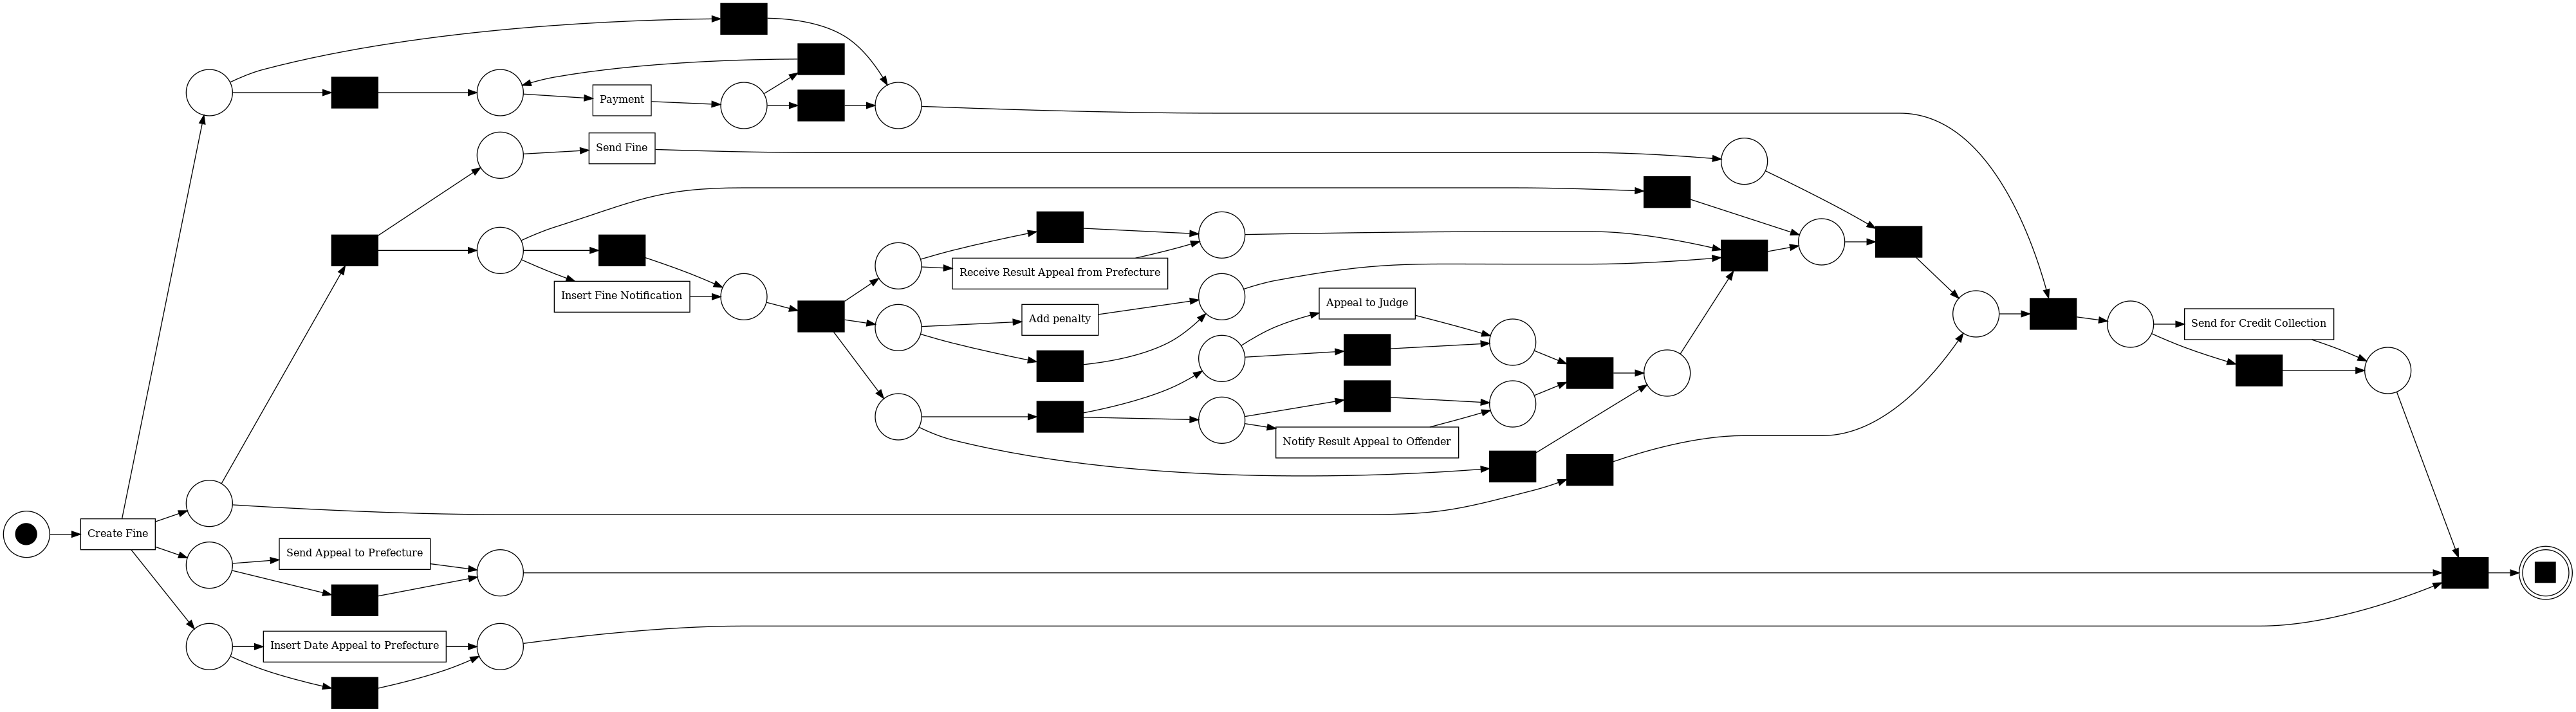

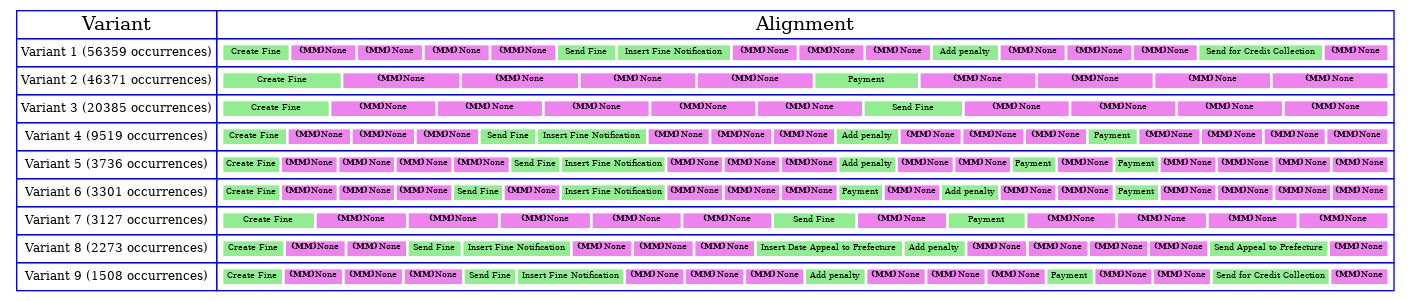

In [23]:
#Find diagnostic table
net, im, fm = pm4py.discover_petri_net_inductive(orginal_data_frame)
alignments_diagnostics = pm4py.conformance_diagnostics_alignments(filtered_log, net, im, fm)
pm4py.view_petri_net(net, im, fm, format='png') 
pm4py.view_alignments(filtered_log, alignments_diagnostics, format='png')

In [24]:
alignments_diagnostics_df = pm4py.conformance_diagnostics_alignments(filtered_log, net, im, fm, return_diagnostics_dataframe=True)

aligning log, completed variants :: 100%|██████████| 9/9 [00:00<00:00, 40.19it/s]


### Fitness for original data

In [25]:
# Discover a process model using the Alpha Miner algorithm
net, initial_marking, final_marking = pm4py.algo.discovery.alpha.algorithm.apply(original_event_log)
# Calculate the fitness of the event log against the discovered process model
fitness = pm4py.algo.evaluation.replay_fitness.algorithm.apply(original_event_log, net, initial_marking, final_marking)

# Print the results
print(f"average_trace_fitness: {fitness['average_trace_fitness']}")
print(f"log fitness: {fitness['log_fitness']}")


replaying log with TBR, completed traces :: 100%|██████████| 231/231 [00:04<00:00, 51.69it/s] 


average_trace_fitness: 0.6741431381488104
log fitness: 0.637766272135165


replaying log with TBR, completed traces :: 100%|██████████| 231/231 [00:07<00:00, 32.95it/s] 


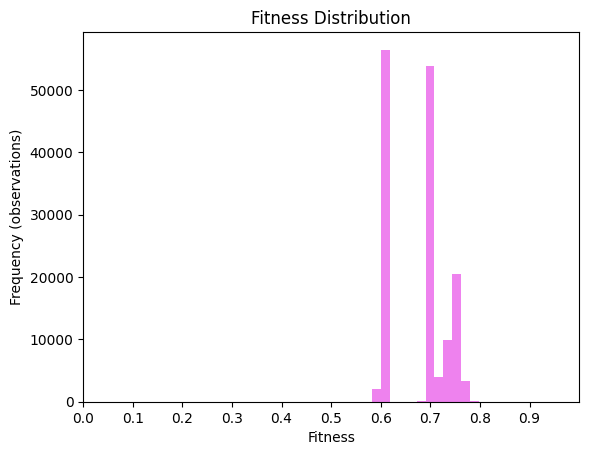

Mean of the fitness values: 0.6741431381487306
Median of the fitness values: 0.7
Sample Standard Deviation of fitness values: 0.05799257077111415


In [26]:
net, im, fm = pm4py.discover_petri_net_alpha(original_event_log)
diagnostics = pm4py.conformance_diagnostics_token_based_replay(original_event_log, net, im, fm, return_diagnostics_dataframe=True)
frequency = diagnostics.groupby('trace_fitness').size().reset_index(name='count')

# Define histogram
plt.hist(diagnostics['trace_fitness'], bins=20, color='violet')
plt.xlabel('Fitness')
plt.ylabel('Frequency (observations)')
plt.title('Fitness Distribution')
plt.xlim(0, 1)
plt.xticks(np.arange(0, 1, 0.1))
plt.show()

# Calculate mean, median, and standard deviation of fitness
mean_difference = diagnostics['trace_fitness'].mean()
print(f"Mean of the fitness values: {mean_difference}")

median_difference = diagnostics['trace_fitness'].median()
print(f"Median of the fitness values: {median_difference}")

std_deviation = np.std(diagnostics['trace_fitness'], ddof=1)
print("Sample Standard Deviation of fitness values:", std_deviation)

### Fitness for filtered data

In [27]:
# Discover a process model using the Alpha Miner algorithm
net, initial_marking, final_marking = pm4py.algo.discovery.alpha.algorithm.apply(filtered_log)
# Calculate the fitness of the event log against the discovered process model
fitness = pm4py.algo.evaluation.replay_fitness.algorithm.apply(filtered_log, net, initial_marking, final_marking)

# Print the results
print(f"average_trace_fitness: {fitness['average_trace_fitness']}")
print(f"log fitness: {fitness['log_fitness']}")

replaying log with TBR, completed traces :: 100%|██████████| 9/9 [00:02<00:00,  3.06it/s]


average_trace_fitness: 0.8145291945051658
log fitness: 0.8009576224898953


replaying log with TBR, completed traces :: 100%|██████████| 9/9 [00:03<00:00,  2.40it/s]


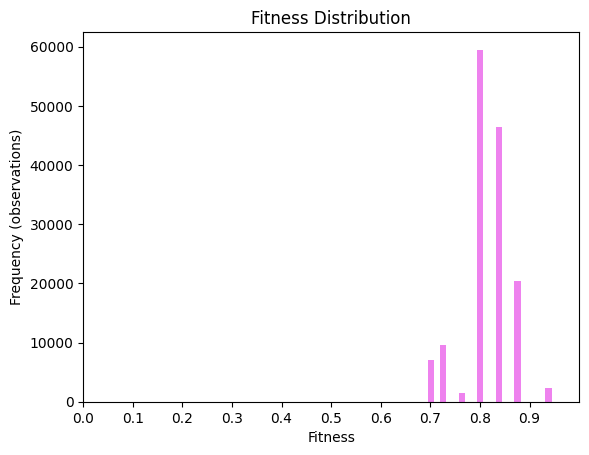

Mean of the fitness values: 0.8145291945066301
Median of the fitness values: 0.8035714285714286
Sample Standard Deviation of fitness values: 0.046117420575037434


In [28]:
net, im, fm = pm4py.discover_petri_net_alpha(filtered_log)
diagnostics = pm4py.conformance_diagnostics_token_based_replay(filtered_log, net, im, fm, return_diagnostics_dataframe=True)
frequency = diagnostics.groupby('trace_fitness').size().reset_index(name='count')

# Define histogram
plt.hist(diagnostics['trace_fitness'], bins=20, color='violet')
plt.xlabel('Fitness')
plt.ylabel('Frequency (observations)')
plt.title('Fitness Distribution')
plt.xlim(0, 1)
plt.xticks(np.arange(0, 1, 0.1))
plt.show()

# Calculate mean, median, and standard deviation of fitness
mean_difference = diagnostics['trace_fitness'].mean()
print(f"Mean of the fitness values: {mean_difference}")

median_difference = diagnostics['trace_fitness'].median()
print(f"Median of the fitness values: {median_difference}")

std_deviation = np.std(diagnostics['trace_fitness'], ddof=1)
print("Sample Standard Deviation of fitness values:", std_deviation)

Bootstrap Mean: 270.62
95% Confidence Interval: [230.86, 311.77]


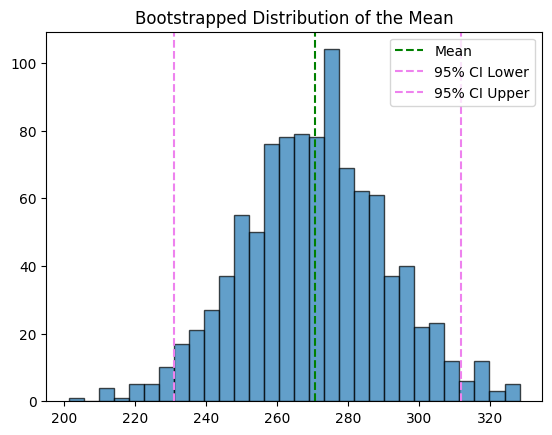

In [36]:
from sklearn.utils import resample

# Sample data (replace with your dataset)
data = np.array(duration_frequency["Count"])

# Function to perform bootstrapping
def bootstrap_statistic(data, n_iterations=1000, statistic=np.mean):
    bootstrap_samples = []
    for _ in range(n_iterations):
        sample = resample(data)
        stat = statistic(sample)
        bootstrap_samples.append(stat)
    return np.array(bootstrap_samples)

# Perform bootstrapping to estimate the mean distribution
bootstrap_means = bootstrap_statistic(data, statistic=np.mean)

# Calculate the 95% confidence interval
ci_lower, ci_upper = np.percentile(bootstrap_means, [2.5, 97.5])

print(f"Bootstrap Mean: {np.mean(bootstrap_means):.2f}")
print(f"95% Confidence Interval: [{ci_lower:.2f}, {ci_upper:.2f}]")

# Plot the bootstrapped distribution
plt.hist(bootstrap_means, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(np.mean(bootstrap_means), color='green', linestyle='--', label='Mean')
plt.axvline(ci_lower, color='violet', linestyle='--', label='95% CI Lower')
plt.axvline(ci_upper, color='violet', linestyle='--', label='95% CI Upper')
plt.title("Bootstrapped Distribution of the Mean")
plt.legend()
plt.show()


Lower bound for outliers: -971.0
Upper bound for outliers: 1629.0


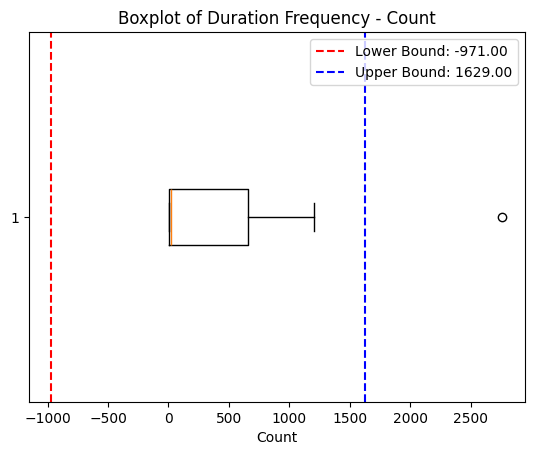

In [40]:
data = duration_frequency["Count"]
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")


plt.boxplot(data, vert=False)
plt.axvline(x=lower_bound, color='red', linestyle='--', label=f'Lower Bound: {lower_bound:.2f}')
plt.axvline(x=upper_bound, color='blue', linestyle='--', label=f'Upper Bound: {upper_bound:.2f}')
plt.title("Boxplot of Duration Frequency - Count")
plt.xlabel("Count")
plt.legend()
plt.show()

In [43]:
data = duration_frequency["Count"].loc[lambda x: (x > lower_bound) & (x < upper_bound)]


Bootstrap Mean: 264.72
95% Confidence Interval: [227.12, 303.20]


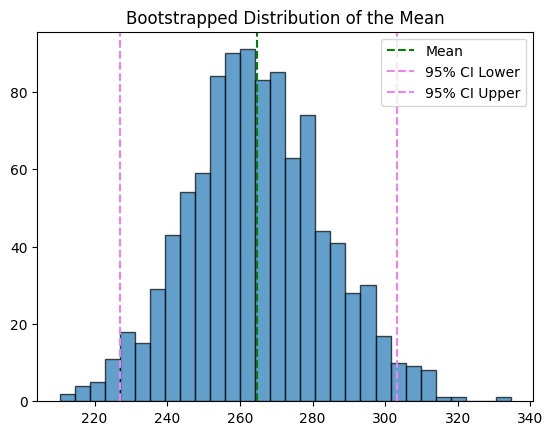

Shapiro-Wilk pvalue: 3.617111763685518e-25
Kolmogorov-Smirnov pvalue: 6.598260946166969e-295
The data is not normally distributed.


In [45]:
# Function to perform bootstrapping
def bootstrap_statistic(data, n_iterations=1000, statistic=np.mean):
    bootstrap_samples = []
    for _ in range(n_iterations):
        sample = resample(data)
        stat = statistic(sample)
        bootstrap_samples.append(stat)
    return np.array(bootstrap_samples)

# Perform bootstrapping to estimate the mean distribution
bootstrap_means = bootstrap_statistic(data, statistic=np.mean)

# Calculate the 95% confidence interval
ci_lower, ci_upper = np.percentile(bootstrap_means, [2.5, 97.5])

print(f"Bootstrap Mean: {np.mean(bootstrap_means):.2f}")
print(f"95% Confidence Interval: [{ci_lower:.2f}, {ci_upper:.2f}]")

# Plot the bootstrapped distribution
plt.hist(bootstrap_means, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(np.mean(bootstrap_means), color='green', linestyle='--', label='Mean')
plt.axvline(ci_lower, color='violet', linestyle='--', label='95% CI Lower')
plt.axvline(ci_upper, color='violet', linestyle='--', label='95% CI Upper')
plt.title("Bootstrapped Distribution of the Mean")
plt.legend()
plt.show()

#perform Shapiro-Wilk test for normality
S_TestResult = shapiro(data)
print(f"Shapiro-Wilk pvalue: {S_TestResult.pvalue}")

#perform Kolmogorov-Smirnov test for normality
K_S_TestResult= kstest(data, 'norm')
print(f"Kolmogorov-Smirnov pvalue: {K_S_TestResult.pvalue}")

if K_S_TestResult.pvalue > 0.05 and S_TestResult.pvalue > 0.05:
    print("There is not enough evidence to reject the null hypothesis that the data is normally distributed.")
else:
    print("The data is not normally distributed.")